<a href="https://colab.research.google.com/github/alexandrufalk/tensorflow/blob/Master/01_Neural_Network_Regression_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Regression with TensorFlow

To simplfy regresion-> predincting a number
efinitions for a regression problem (https://en.wikipedia.org/wiki/Regression_analysis)

# Typical architecture of a regresison neural network

 -the following is a generic setup for ingesting a collection of numbers, finding patterns in them and then outputting some kind of target number.

**Hyperparameter -	Typical value**

Input layer shape -	Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction)

Hidden layer(s) -	Problem specific, minimum = 1, maximum = unlimited

Neurons per hidden layer -	Problem specific, generally 10 to 100

Output layer shape -	Same shape as desired prediction shape (e.g. 1 for house price)

Hidden activation -	Usually ReLU (rectified linear unit)

Output activation -	None, ReLU, logistic/tanh

Loss function -	MSE (mean square error) or MAE (mean absolute error)/Huber (combination of MAE/MSE) if outliers

Optimizer -	SGD (stochastic gradient descent), Adam

Table 1: Typical architecture of a regression network. Source: Adapted from page 293 of Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron


🔑 Note: A hyperparameter in machine learning is something a data analyst or developer can set themselves, where as a parameter usually describes something a model learns on its own (a value not explicitly set by an analyst).

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


# Creating data to view and fit

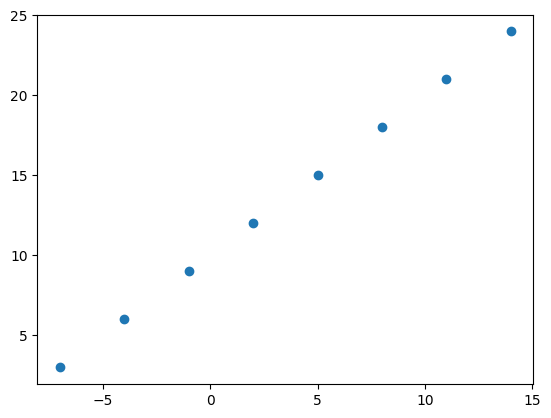

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);


In [ ]:
y==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
# Take a single example of X
input_shape = X[0].shape

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

((), ())

In [ ]:

#  look at the single examples invidually
X[0], y[0]

(-7.0, 3.0)

In [ ]:
# Turn numpy arrays into tensors
X=tf.constant(X)
y=tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

# Steps in modelling with TensorFlow

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

**1.Creating a model** - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).

**2/Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).

**3.Fitting a model** - letting the model try to find patterns in the data (how does X get to y).

In [ ]:
#Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error. Computes the mean of absolute difference between labels and predictions.
              optimizer=tf.keras.optimizers.SGD(), #sgd is short for stochastic gradient descendent)
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 425ms/step - loss: 11.7089 - mae: 11.7089
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 11.5764 - mae: 11.5764
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 11.4439 - mae: 11.4439
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 11.3114 - mae: 11.3114
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 11.1789 - mae: 11.1789


In [ ]:

# Make a prediction with the model
model.predict([17.0])

1/1 [==============================] - 0s 255ms/step


array([[8.609025]], dtype=float32)

# Improving a model

To improve our model, we alter almost every part of the 3 steps we went through before.

**Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
**Compiling a model** - you might want to choose optimization function or perhaps change the learning rate of the optimization function.
**Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
# Rebuild the model

# 1. Create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model -will be trained longer
model.fit(tf.expand_dims(X,axis=1),y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 447ms/step - loss: 8.4047 - mae: 8.4047
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 8.2722 - mae: 8.2722
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 8.1397 - mae: 8.1397
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 8.0072 - mae: 8.0072
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 7.8747 - mae: 7.8747
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 7.7422 - mae: 7.7422
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 7.6097 - mae: 7.6097
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 7.4772 - mae: 7.4772
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 7.4400 - mae: 7.4400
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 7.4344 - mae: 7.4344
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss: 7

In [ ]:
# Make a prediction with the model

model.predict([17.0])

1/1 [==============================] - 0s 234ms/step


array([[30.278488]], dtype=float32)

In [ ]:
# Rebuild the model

# 1. Create the model
model=tf.keras.Sequential([tf.keras.layers.Dense(100,activation='relu'),
                           tf.keras.layers.Dense(1)])

#2. Compile

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
#3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 638ms/step - loss: 12.6588 - mae: 12.6588
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 12.0667 - mae: 12.0667
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 11.4854 - mae: 11.4854
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9059 - mae: 10.9059
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.3096 - mae: 10.3096
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 9.6832 - mae: 9.6832
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 9.0253 - mae: 9.0253
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 8.3353 - mae: 8.3353
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 7.6046 - mae: 7.6046
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 6.8236 - mae: 6.8236
Epoch 11/100
1/1 [==============================] - 0s 10ms/ste

In [ ]:
# Make a prediction with the model

model.predict([17.0])

1/1 [==============================] - 0s 120ms/step


array([[32.582264]], dtype=float32)

In [ ]:
# Rebuild the model

# 1. Create the model
model=tf.keras.Sequential([tf.keras.layers.Dense(100,activation='relu'),
                           tf.keras.layers.Dense(100,activation='relu'),
                           tf.keras.layers.Dense(100,activation='relu'),
                           tf.keras.layers.Dense(1)])

# 2. compile

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])

# 3. Fit the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 863ms/step - loss: 13.6703 - mae: 13.6703
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.3372 - mae: 13.3372
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 13.0118 - mae: 13.0118
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 12.7166 - mae: 12.7166
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 12.4336 - mae: 12.4336
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 12.1610 - mae: 12.1610
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 11.8982 - mae: 11.8982
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 11.6400 - mae: 11.6400
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 11.3805 - mae: 11.3805
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 11.1210 - mae: 11.1210
Epoch 11/100
1/1 [==============================]

In [ ]:
# Make a prediction with the model

model.predict([17.0])

1/1 [==============================] - 0s 86ms/step


array([[30.616465]], dtype=float32)